<a href="https://colab.research.google.com/github/singhmihir8/signLanguageModel/blob/main/signLanguageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

### **RUN THESE CELLS BELOW IF STORED MODEL ISN'T WORKING**

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders('/content/Letters')

dls.show_batch(max_n=15)

TypeError: ignored

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.653407,0.070498,0.028283,04:19


epoch,train_loss,valid_loss,error_rate,time
0,0.078305,0.011667,0.004040,06:23
1,0.042065,0.032039,0.008081,06:07
2,0.022704,0.028425,0.010101,06:09


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
model_path = "/content/gdrive/MyDrive/signLanguageModel.pkl"
learn.export(model_path)

NameError: ignored

## **RUN THESE CELLS BELOW IF IMPORTING MODEL FROM GOOGLE DRIVE WORKS PROPERLY**

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
model_path = "/content/gdrive/MyDrive/signLanguageModel.pkl"
learn = load_learner(model_path)

In [8]:
is_A,_,probsA = learn.predict(PILImage.create('FILL IN THE BLANK WITH YOUR OWN PATH TO THE IMAGE'))
print(f"This is a: {is_A}.")
print(f"Probability it's correct: {probsA[3]:.4f}")

FileNotFoundError: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


CameraStream(constraints={'audio': False, 'video': True})

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'audio': False, 'video': True}))

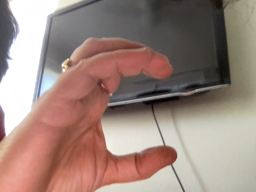

This is a: C.
Probability it's correct: 0.5337


In [12]:
!pip install ipywebrtc
from IPython.display import display, Image
from google.colab import output
from ipywebrtc import CameraStream, ImageRecorder
from PIL import Image as PILImage
from PIL import ImageOps as PILImageOps
from fastai.vision.all import *
import io

# Load the trained model


# Function to predict sign language letter from an image
def predict_letter(image):
    letter, _, prob_correct = learn.predict(image)
    return letter, max(prob_correct).item()

# Create the camera stream and image recorder
camera_stream = CameraStream(constraints={'audio': False, 'video': True})
image_recorder = ImageRecorder(stream=camera_stream)

# Function to process the captured image and make predictions
def process_image(change):
    img_data = change['new']
    img = PILImage.create(io.BytesIO(img_data))
    img.thumbnail((256, 256))
    img = PILImageOps.exif_transpose(img)  # Rotate the image if needed
    img.show()
    letter, probability = predict_letter(img)
    print(f"This is a: {letter}.")
    print(f"Probability it's correct: {probability:.4f}")

# Link the image recorder to the process_image function
image_recorder.image.observe(process_image, names='value')

# Enable the custom widget manager
output.enable_custom_widget_manager()

# Display the camera stream and image recorder
display(camera_stream)
display(image_recorder)